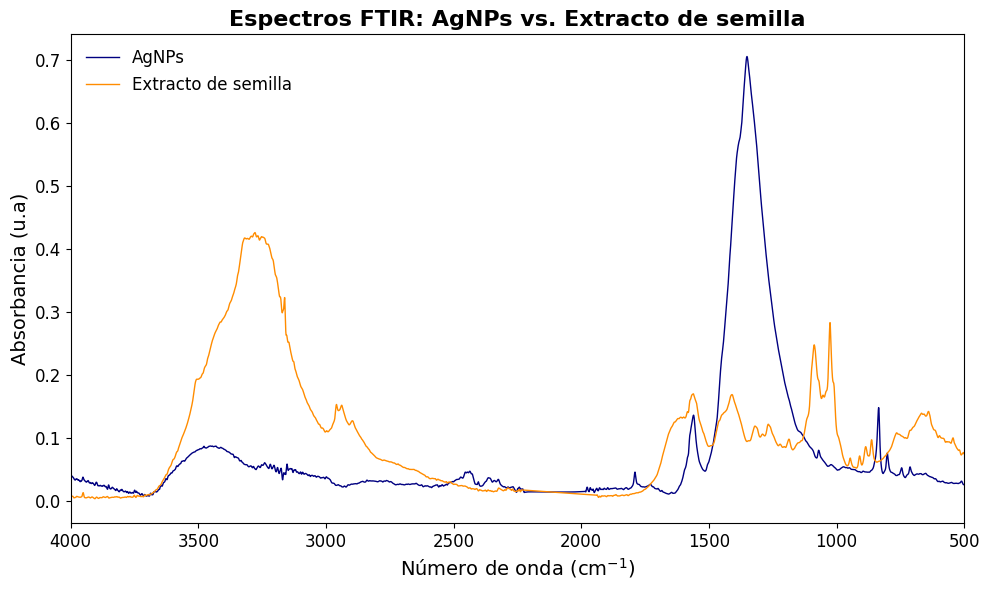

In [4]:
# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar los espectros con líneas más delgadas
plt.plot(wn_ag, abs_ag, label='AgNPs', color='navy', linewidth=1)  # Cambiado linewidth a 1
plt.plot(wn_seed, abs_seed, label='Extracto de semilla', color='darkorange', linewidth=1)  # Cambiado linewidth a 1

# Ajustar ejes y etiquetas
plt.gca().invert_xaxis()  # Invertir el eje X para estilo FTIR
plt.xlim(4000, 500)  # Ajustar rango del eje X
plt.xlabel('Número de onda (cm$^{-1}$)', fontsize=14)
plt.ylabel('Absorbancia (u.a)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Eliminar márgenes para el eje X
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Añadir título y leyenda mejorada
plt.title('Espectros FTIR: AgNPs vs. Extracto de semilla', fontsize=16, weight='bold')
plt.legend(loc='upper left', fontsize=12, frameon=False)

# Ajustar diseño general
plt.tight_layout()

# Crear la carpeta si no existe
output_dir = '../files/plots/'
os.makedirs(output_dir, exist_ok=True)

# Guardar el gráfico en la ubicación especificada
plt.savefig(os.path.join(output_dir, 'spectrum.png'), dpi=300)

# Mostrar el gráfico
plt.show()


